# ML Model results vs DrugCentral Gold Standard

In [1]:
from pathlib import Path

%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import average_precision_score, roc_auc_score

from hetnet_ml.src import plot_tools as pt

In [2]:
load_dir = Path('../2_pipeline/full_dataset_training/out/').resolve()

In [3]:
probas = dict()
coefs = dict()

# load the data given the right params
for file in load_dir.iterdir():
    if '.' not in file.name:
        date = file.name
        probas[date] = pd.read_csv(file.joinpath('predictions.csv'))
        coefs[date] = pd.read_csv(file.joinpath('coefs.csv'))

In [4]:
probas[date].head(2)

,c_id,c_name,d_id,d_name,status,probas,c_percentile,d_percentile
0,Q1002165,fluticasone,Q1003534,bulbar syndrome,0,0.019008,0.283535,0.000472
1,Q419939,doxazosin,Q1003534,bulbar syndrome,0,0.019008,0.379953,0.000945


In [5]:
dates = sorted(probas.keys())

In [6]:
dc_gs = pd.read_csv('../2_pipeline/05_converting_DrugCentral_indications_to_WikiData/out/gold_standard.csv')
dc_gs.head(2)

,id,struct_id,concept_id,relationship_name,concept_name,umls_cui,snomed_full_name,cui_semantic_type,snomed_conceptid,comp_wd_id,dis_wd_id
0,173432,965,40249340,indication,Malignant tumor of breast,C0006142,Malignant tumor of breast,T191,254837009.0,Q5308606,Q128581
1,173433,318,21000716,indication,Gout,C0018099,Gout,T047,90560007.0,Q410435,Q133087


In [7]:
pos_ind = dc_gs.dropna(subset=['comp_wd_id', 'dis_wd_id'])[['comp_wd_id', 'dis_wd_id']]
pos_ind_tup = pos_ind.apply(tuple, axis=1)

## ROC of DrugCentral Gold standard as positives, Random negatives

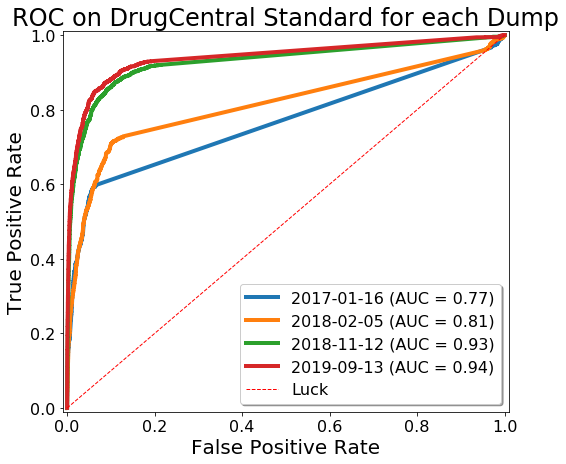

In [8]:
for date in dates:
    this_probas = probas[date]
    
    cd_tup = pd.Series(list(this_probas[['c_id', 'd_id']].itertuples(index=False, name=None)), name='ind')
    pos_idx = cd_tup.to_frame().query('ind in @pos_ind_tup').index
    
    true = this_probas.loc[pos_idx]
    false = this_probas.loc[~this_probas.index.isin(pos_idx)].sample(10*len(true))

    y = [1]*len(true) + [0]*len(false)
    y_pred = true['probas'].tolist() + false['probas'].tolist()
    
    pt.graph_single_roc(y, y_pred, label=date)
pt.graph_roc_boilerplate('ROC on DrugCentral Standard for each Dump');

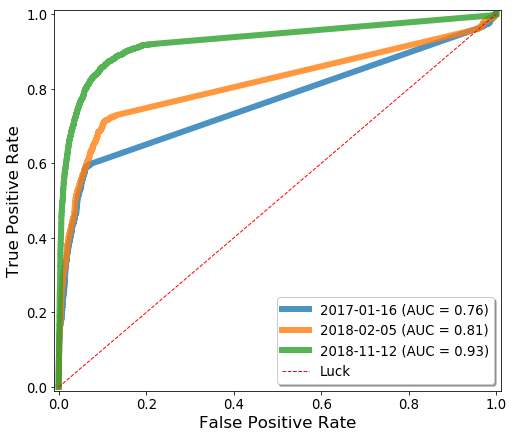

In [9]:
to_plot = ['2017-01-16', '2018-02-05', '2018-11-12']

for date in to_plot:

    this_probas = probas[date]
    
    cd_tup = pd.Series(list(this_probas[['c_id', 'd_id']].itertuples(index=False, name=None)), name='ind')
    pos_idx = cd_tup.to_frame().query('ind in @pos_ind_tup').index
    
    true = this_probas.loc[pos_idx]
    false = this_probas.loc[~this_probas.index.isin(pos_idx)].sample(10*len(true))

    y = [1]*len(true) + [0]*len(false)
    y_pred = true['probas'].tolist() + false['probas'].tolist()
    
    pt.graph_single_roc(y, y_pred, label=date, lw=6, alpha=.8)
pt.graph_roc_boilerplate('', size=20)
plt.savefig('drug_central.svg');

## Now only look at those indications form DrugCentral that were not used in training model

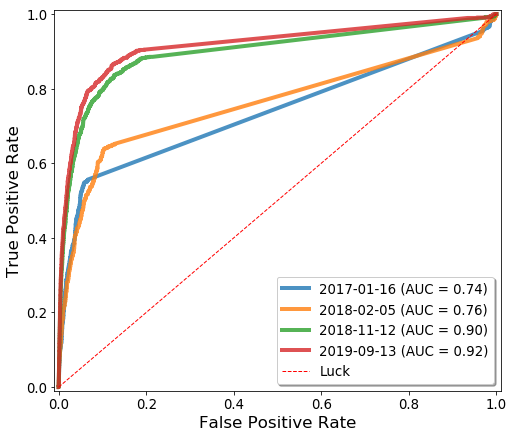

In [10]:
for date in dates:

    this_probas = probas[date]
    
    cd_tup = pd.Series(list(this_probas[['c_id', 'd_id']].itertuples(index=False, name=None)), name='ind')
    pos_idx = cd_tup.to_frame().query('ind in @pos_ind_tup').index
    
    true = this_probas.loc[pos_idx]
    false = this_probas.loc[~this_probas.index.isin(pos_idx)].sample(100*len(true))

    true = true.query('status == 0')
    
    y = [1]*len(true) + [0]*len(false)
    y_pred = true['probas'].tolist() + false['probas'].tolist()
    
    pt.graph_single_roc(y, y_pred, label=date, lw=4, alpha=.8)
pt.graph_roc_boilerplate('', size=20);

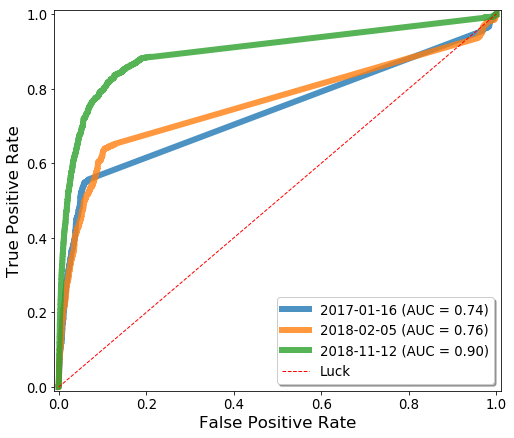

In [11]:
to_plot = ['2017-01-16', '2018-02-05', '2018-11-12']

for date in to_plot:

    this_probas = probas[date]
    
    cd_tup = pd.Series(list(this_probas[['c_id', 'd_id']].itertuples(index=False, name=None)), name='ind')
    pos_idx = cd_tup.to_frame().query('ind in @pos_ind_tup').index
    
    true = this_probas.loc[pos_idx]
    false = this_probas.loc[~this_probas.index.isin(pos_idx)].sample(100*len(true))

    true = true.query('status == 0')
    
    y = [1]*len(true) + [0]*len(false)
    y_pred = true['probas'].tolist() + false['probas'].tolist()
    
    pt.graph_single_roc(y, y_pred, label=date, lw=6, alpha=.8)
pt.graph_roc_boilerplate('', size=20)
plt.savefig('drug_central1.svg');

## The effect of negative sample size on Precision Recall

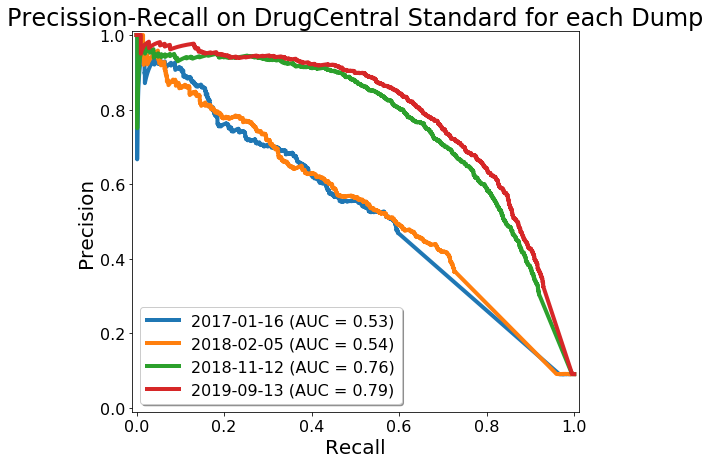

In [12]:
for date in dates:
    this_probas = probas[date]
    
    cd_tup = pd.Series(list(this_probas[['c_id', 'd_id']].itertuples(index=False, name=None)), name='ind')
    pos_idx = cd_tup.to_frame().query('ind in @pos_ind_tup').index
    
    true = this_probas.loc[pos_idx]
    false = this_probas.loc[~this_probas.index.isin(pos_idx)].sample(10*len(true))

    y = [1]*len(true) + [0]*len(false)
    y_pred = true['probas'].tolist() + false['probas'].tolist()
    
    pt.graph_single_prc(y, y_pred, label=date)
pt.graph_prc_boilerplate('Precission-Recall on DrugCentral Standard for each Dump');

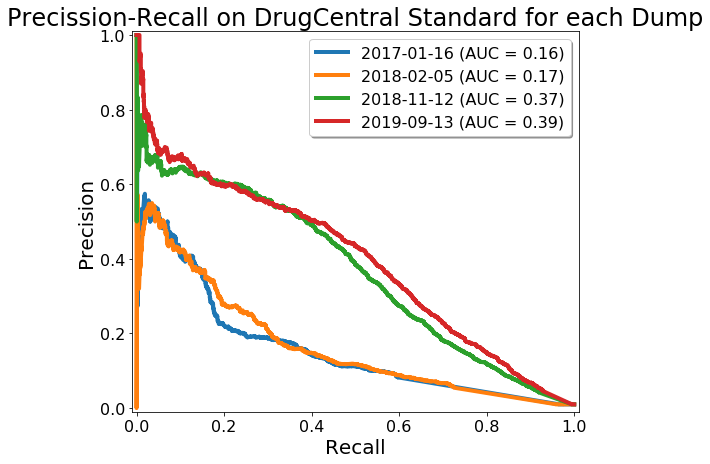

In [13]:
for date in dates:
    this_probas = probas[date]
    
    cd_tup = pd.Series(list(this_probas[['c_id', 'd_id']].itertuples(index=False, name=None)), name='ind')
    pos_idx = cd_tup.to_frame().query('ind in @pos_ind_tup').index
    
    true = this_probas.loc[pos_idx]
    false = this_probas.loc[~this_probas.index.isin(pos_idx)].sample(100*len(true))

    y = [1]*len(true) + [0]*len(false)
    y_pred = true['probas'].tolist() + false['probas'].tolist()
    
    pt.graph_single_prc(y, y_pred, label=date)
pt.graph_prc_boilerplate('Precission-Recall on DrugCentral Standard for each Dump');

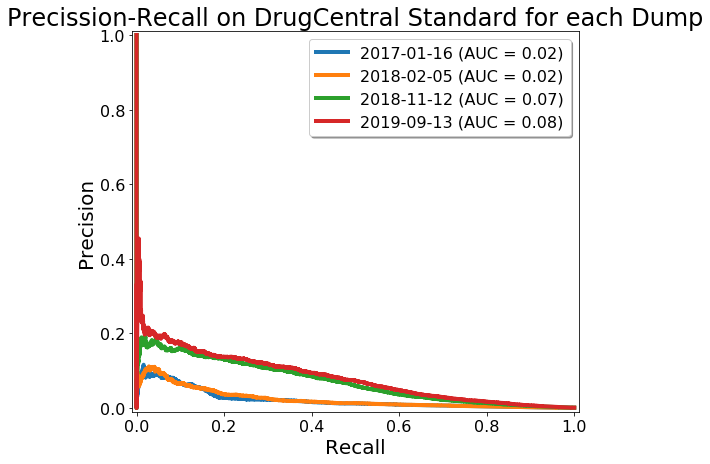

In [14]:
for date in dates:
    this_probas = probas[date]
    
    cd_tup = pd.Series(list(this_probas[['c_id', 'd_id']].itertuples(index=False, name=None)), name='ind')
    pos_idx = cd_tup.to_frame().query('ind in @pos_ind_tup').index
    
    true = this_probas.loc[pos_idx]
    false = this_probas.loc[~this_probas.index.isin(pos_idx)].sample(1000*len(true))

    y = [1]*len(true) + [0]*len(false)
    y_pred = true['probas'].tolist() + false['probas'].tolist()
    
    pt.graph_single_prc(y, y_pred, label=date)
pt.graph_prc_boilerplate('Precission-Recall on DrugCentral Standard for each Dump');

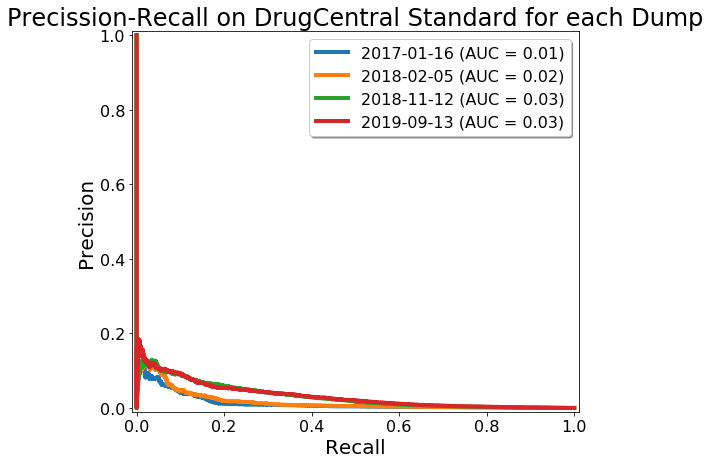

In [15]:
for date in dates:
    this_probas = probas[date]
    
    cd_tup = pd.Series(list(this_probas[['c_id', 'd_id']].itertuples(index=False, name=None)), name='ind')
    pos_idx = cd_tup.to_frame().query('ind in @pos_ind_tup').index
    
    true = this_probas.loc[pos_idx]
    false = this_probas.loc[~this_probas.index.isin(pos_idx)].query('status != 1')

    y = [1]*len(true) + [0]*len(false)
    y_pred = true['probas'].tolist() + false['probas'].tolist()
    
    pt.graph_single_prc(y, y_pred, label=date)
pt.graph_prc_boilerplate('Precission-Recall on DrugCentral Standard for each Dump');